In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [124]:
df_spotify_3 = pd.read_pickle(r'C:\Users\kagan\Dropbox\קורס DS בר-אילן\שיעורים\Projects\Project 3 - ML preparation and model\Spotify_data\df_spotify_after_feature_selection.pkl')

In [125]:
df_spotify_3.info() # we don't need to do label encoding as all the variables are boolian or numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26420 entries, 0 to 26419
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   danceability               26420 non-null  float64
 1   energy                     26420 non-null  float64
 2   key                        26420 non-null  int64  
 3   loudness                   26420 non-null  float64
 4   mode                       26420 non-null  int64  
 5   speechiness                26420 non-null  float64
 6   acousticness               26420 non-null  float64
 7   instrumentalness           26420 non-null  float64
 8   liveness                   26420 non-null  float64
 9   valence                    26420 non-null  float64
 10  tempo                      26420 non-null  float64
 11  duration_ms                26420 non-null  int64  
 12  track_album_release_year   26420 non-null  int64  
 13  track_album_release_month  26420 non-null  int

In [126]:

# Define X and y from your dataset (df_spotify_3)
# X contains all features except the target 'track_popularity'
X = df_spotify_3.drop('track_popularity', axis=1)
y = df_spotify_3['track_popularity']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets for verification
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (21136, 22)
Test set shape: (5284, 22)


In [127]:
# ---------------------------
# Regression Metrics Function
# ---------------------------
def regressionMetrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    # RMSLE: using np.log1p to safely handle zero values
    rmsle = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RMSLE": rmsle}



In [128]:

# ---------------------------
# Function to update and display the cumulative metrics table
# ---------------------------
models_list = pd.DataFrame()

def update_metrics(model_name, metrics_dict):
    global models_list
    new_row = pd.DataFrame([{**{'model': model_name}, **metrics_dict}])
    models_list = pd.concat([models_list, new_row], ignore_index=True)
    print(f"\n{model_name} Metrics:")
    display(pd.DataFrame([metrics_dict]))
    print("Updated Metrics Table:")
    display(models_list)

### Linear Regression


Linear Regression Metrics:


,MSE,RMSE,MAE,R2,RMSLE
0,479.792002,21.904155,18.267214,0.101798,1.261798


Updated Metrics Table:


,model,MSE,RMSE,MAE,R2,RMSLE
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798


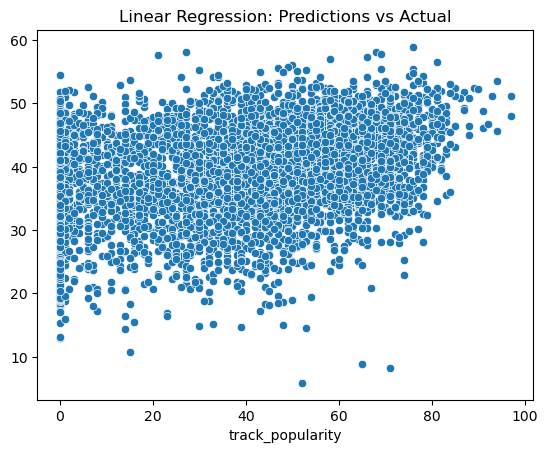

In [130]:

# ---------------------------
# Linear Regression
# ---------------------------
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_test_pred_lr = model_lr.predict(X_test)
metrics_lr = regressionMetrics(y_test, y_test_pred_lr)
update_metrics("Linear Regression", metrics_lr)
sns.scatterplot(x=y_test, y=y_test_pred_lr)
plt.title("Linear Regression: Predictions vs Actual")
plt.show()


Decision Tree Metrics:


,MSE,RMSE,MAE,R2,RMSLE
0,868.123391,29.463934,23.018925,-0.625184,1.601409


Updated Metrics Table:


,model,MSE,RMSE,MAE,R2,RMSLE
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798
1,Decision Tree,868.123391,29.463934,23.018925,-0.625184,1.601409


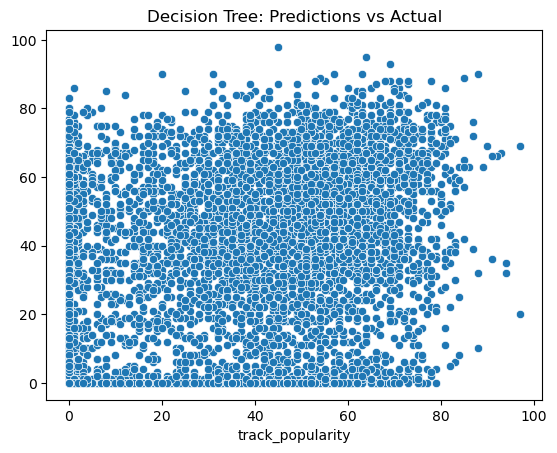

In [131]:

# ---------------------------
# Decision Tree Regressor
# ---------------------------
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)
y_test_pred_dt = mod2.predict(X_test)
metrics_dt = regressionMetrics(y_test, y_test_pred_dt)
update_metrics("Decision Tree", metrics_dt)
sns.scatterplot(x=y_test, y=y_test_pred_dt)
plt.title("Decision Tree: Predictions vs Actual")
plt.show()




Random Forest Metrics:


,MSE,RMSE,MAE,R2,RMSLE
0,440.428407,20.986386,17.288945,0.175489,1.205357


Updated Metrics Table:


,model,MSE,RMSE,MAE,R2,RMSLE
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798
1,Decision Tree,868.123391,29.463934,23.018925,-0.625184,1.601409
2,Random Forest,440.428407,20.986386,17.288945,0.175489,1.205357


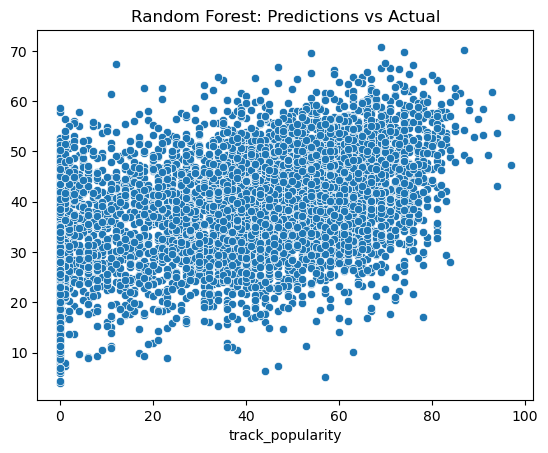

In [132]:

# ---------------------------
# Random Forest Regressor
# ---------------------------
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)
y_test_pred_rf = mod3.predict(X_test)
metrics_rf = regressionMetrics(y_test, y_test_pred_rf)
update_metrics("Random Forest", metrics_rf)
sns.scatterplot(x=y_test, y=y_test_pred_rf)
plt.title("Random Forest: Predictions vs Actual")
plt.show()



AdaBoost Metrics:


,MSE,RMSE,MAE,R2,RMSLE
0,474.354031,21.77967,18.379273,0.111978,1.246901


Updated Metrics Table:


,model,MSE,RMSE,MAE,R2,RMSLE
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798
1,Decision Tree,868.123391,29.463934,23.018925,-0.625184,1.601409
2,Random Forest,440.428407,20.986386,17.288945,0.175489,1.205357
3,AdaBoost,474.354031,21.779670,18.379273,0.111978,1.246901


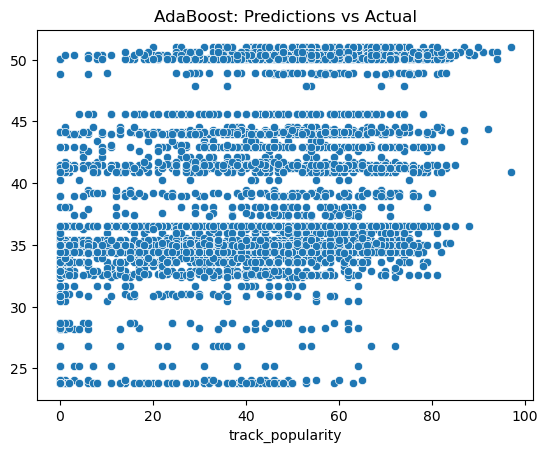

In [133]:

# ---------------------------
# AdaBoost Regressor
# ---------------------------
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)
y_test_pred_ada = mod4.predict(X_test)
metrics_ada = regressionMetrics(y_test, y_test_pred_ada)
update_metrics("AdaBoost", metrics_ada)
sns.scatterplot(x=y_test, y=y_test_pred_ada)
plt.title("AdaBoost: Predictions vs Actual")
plt.show()



GBM Metrics:


,MSE,RMSE,MAE,R2,RMSLE
0,442.208132,21.028745,17.526977,0.172157,1.224126


Updated Metrics Table:


,model,MSE,RMSE,MAE,R2,RMSLE
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798
1,Decision Tree,868.123391,29.463934,23.018925,-0.625184,1.601409
2,Random Forest,440.428407,20.986386,17.288945,0.175489,1.205357
3,AdaBoost,474.354031,21.779670,18.379273,0.111978,1.246901
4,GBM,442.208132,21.028745,17.526977,0.172157,1.224126


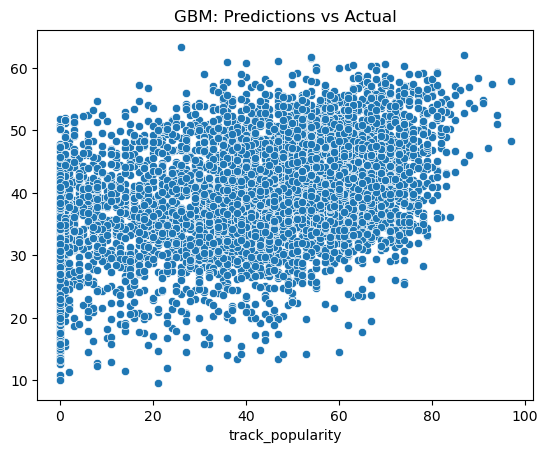

In [134]:

# ---------------------------
# Gradient Boosting Regressor (GBM)
# ---------------------------
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)
y_test_pred_gbm = mod5.predict(X_test)
metrics_gbm = regressionMetrics(y_test, y_test_pred_gbm)
update_metrics("GBM", metrics_gbm)
sns.scatterplot(x=y_test, y=y_test_pred_gbm)
plt.title("GBM: Predictions vs Actual")
plt.show()



SVR Metrics:


,MSE,RMSE,MAE,R2,RMSLE
0,525.978665,22.934225,18.930556,0.015333,1.311482


Updated Metrics Table:


,model,MSE,RMSE,MAE,R2,RMSLE
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798
1,Decision Tree,868.123391,29.463934,23.018925,-0.625184,1.601409
2,Random Forest,440.428407,20.986386,17.288945,0.175489,1.205357
3,AdaBoost,474.354031,21.779670,18.379273,0.111978,1.246901
4,GBM,442.208132,21.028745,17.526977,0.172157,1.224126
5,SVR,525.978665,22.934225,18.930556,0.015333,1.311482


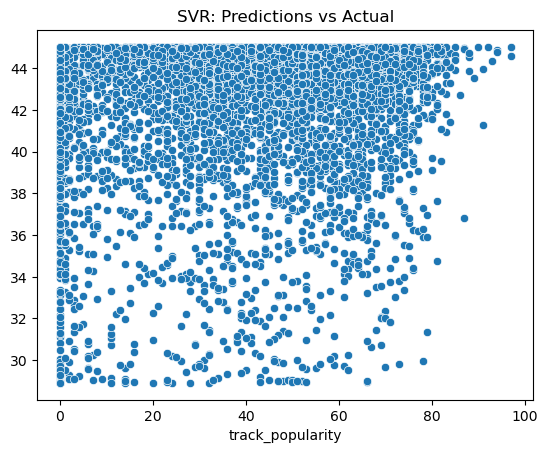

In [135]:

# ---------------------------
# Support Vector Regressor (SVR)
# ---------------------------
mod6 = SVR()
mod6.fit(X_train, y_train)
y_test_pred_svr = mod6.predict(X_test)
metrics_svr = regressionMetrics(y_test, y_test_pred_svr)
update_metrics("SVR", metrics_svr)
sns.scatterplot(x=y_test, y=y_test_pred_svr)
plt.title("SVR: Predictions vs Actual")
plt.show()


XGB Metrics:


,MSE,RMSE,MAE,R2,RMSLE
0,456.809402,21.3731,17.523881,0.144823,1.206127


Updated Metrics Table:


,model,MSE,RMSE,MAE,R2,RMSLE
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798
1,Decision Tree,868.123391,29.463934,23.018925,-0.625184,1.601409
2,Random Forest,440.428407,20.986386,17.288945,0.175489,1.205357
3,AdaBoost,474.354031,21.779670,18.379273,0.111978,1.246901
4,GBM,442.208132,21.028745,17.526977,0.172157,1.224126
5,SVR,525.978665,22.934225,18.930556,0.015333,1.311482
6,XGB,456.809402,21.373100,17.523881,0.144823,1.206127


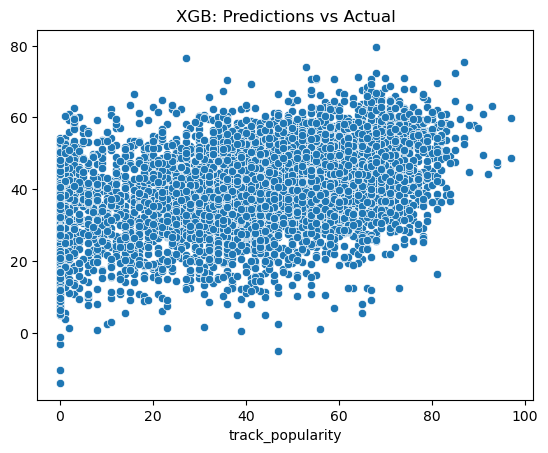

In [136]:

# ---------------------------
# XGBoost Regressor
# ---------------------------
mod7 = xgb.XGBRegressor(random_state=1)
mod7.fit(X_train, y_train)
y_test_pred_xgb = mod7.predict(X_test)
metrics_xgb = regressionMetrics(y_test, y_test_pred_xgb)
update_metrics("XGB", metrics_xgb)
sns.scatterplot(x=y_test, y=y_test_pred_xgb)
plt.title("XGB: Predictions vs Actual")
plt.show()



In [149]:

# ---------------------------
# Final Summary Table of Model Metrics
# ---------------------------
print("Final Model Metrics Summary (sorted by MAE):")
display(models_list.sort_values('MAE'))

Final Model Metrics Summary (sorted by MAE):


,model,MSE,RMSE,MAE,R2,RMSLE
2,Random Forest,440.428407,20.986386,17.288945,0.175489,1.205357
6,XGB,456.809402,21.373100,17.523881,0.144823,1.206127
4,GBM,442.208132,21.028745,17.526977,0.172157,1.224126
0,Linear Regression,479.792002,21.904155,18.267214,0.101798,1.261798
3,AdaBoost,474.354031,21.779670,18.379273,0.111978,1.246901
5,SVR,525.978665,22.934225,18.930556,0.015333,1.311482
1,Decision Tree,868.123391,29.463934,23.018925,-0.625184,1.601409
